In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
df=pd.read_csv('TFG.csv')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14206 entries, 0 to 14205
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case_number             14206 non-null  object 
 1   District_name           14206 non-null  object 
 2   Week_day                14206 non-null  object 
 3   Year                    14206 non-null  int64  
 4   Month_name              14206 non-null  object 
 5   Day_month               14206 non-null  int64  
 6   Type_of_vehicle         14206 non-null  object 
 7   Sex                     14206 non-null  object 
 8   Age                     14206 non-null  object 
 9   Person_type             14206 non-null  object 
 10  Injury_severity         14206 non-null  int64  
 11  Day                     14206 non-null  object 
 12  Time_segment            14206 non-null  object 
 13  Vacation_day            14206 non-null  bool   
 14  Numero_expedient_count  14206 non-null

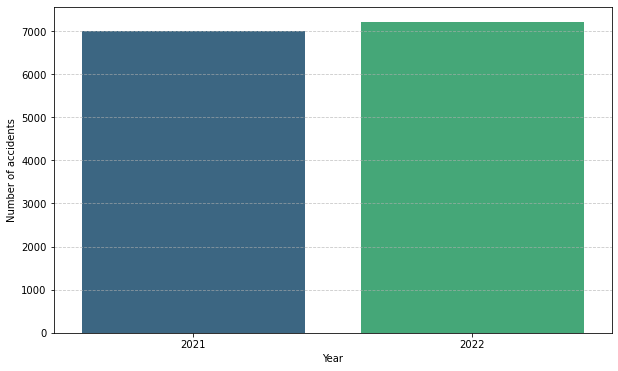

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado 'df' con la columna 'Year'
# Asegúrate de reemplazar 'df' con el nombre real de tu DataFrame

# Contar el número de accidentes por año
accidents_by_year = df['Year'].value_counts().sort_index()

# Crear un histograma del número de accidentes por año con colores diferentes
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_year.index, y=accidents_by_year.values, palette='viridis')
plt.xlabel('Year')
plt.ylabel('Number of accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


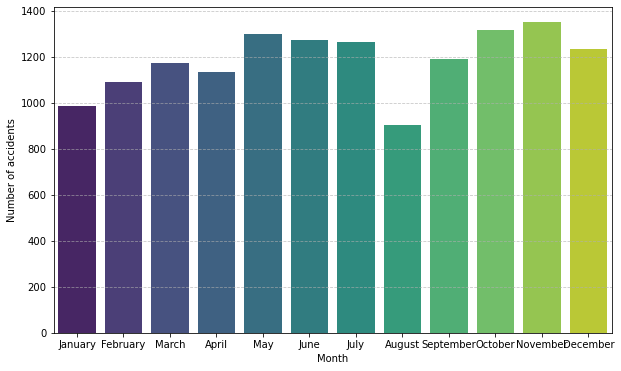

In [13]:
order_of_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

accidents_by_month = df['Month_name'].value_counts().loc[order_of_months]

# Crear un histograma del número de accidentes por mes con colores diferentes
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_month.index, y=accidents_by_month.values, palette='viridis', order=order_of_months)
plt.xlabel('Month')
plt.ylabel('Number of accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


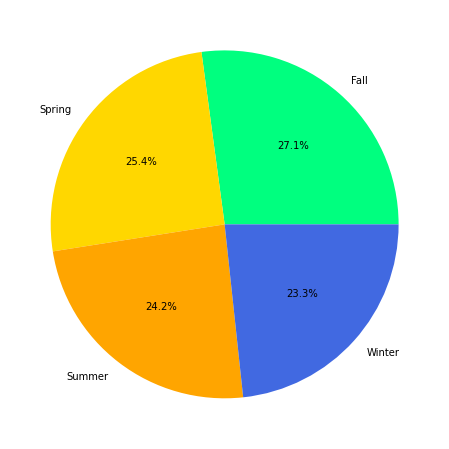

In [15]:
season_percentages = df['Season'].value_counts(normalize=True) * 100

# Crear un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(season_percentages, labels=season_percentages.index, autopct='%1.1f%%', colors=['springgreen', 'gold', 'orange', 'royalblue'])
plt.show()


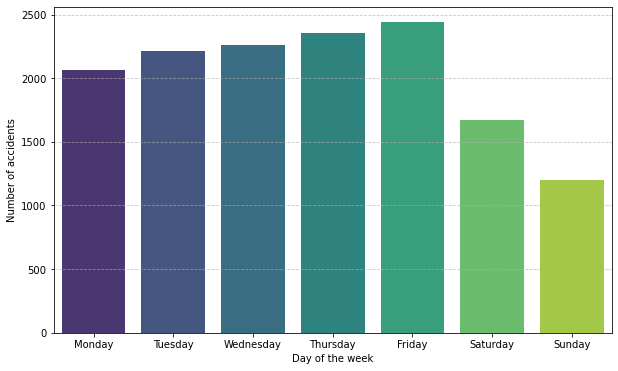

In [17]:
order_of_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

accidents_by_day = df['Week_day'].value_counts().loc[order_of_days]

# Crear un histograma del número de accidentes por mes con colores diferentes
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_day.index, y=accidents_by_day.values, palette='viridis', order=order_of_days)
plt.xlabel('Day of the week')
plt.ylabel('Number of accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [21]:
df['Weekend Exists'].value_counts()

False    11636
True      2570
Name: Weekend Exists, dtype: int64

In [27]:
2570/120

21.416666666666668

In [29]:
11636/610

19.075409836065575

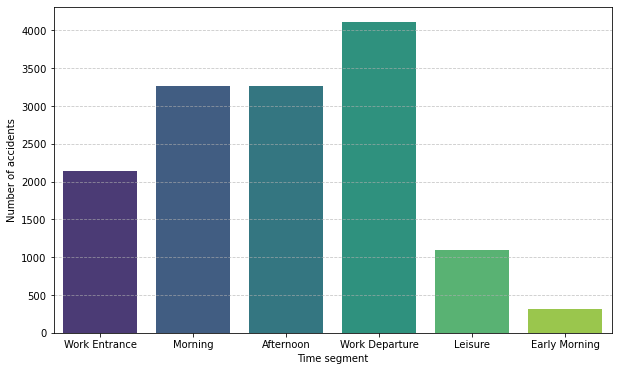

In [30]:
order_of_seg = ["Work Entrance", "Morning", "Afternoon", "Work Departure", "Leisure", "Early Morning"]

accidents_by_seg = df['Time_segment'].value_counts().loc[order_of_seg]

# Crear un histograma del número de accidentes por mes con colores diferentes
plt.figure(figsize=(10, 6))
sns.barplot(x=accidents_by_seg.index, y=accidents_by_seg.values, palette='viridis', order=order_of_seg)
plt.xlabel('Time segment')
plt.ylabel('Number of accidents')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

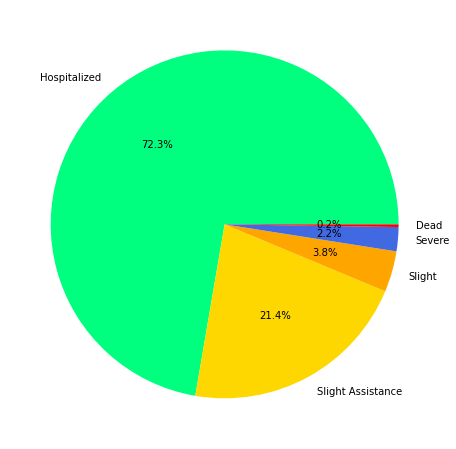

In [33]:
injury_severity_mapping = {
    0: 'Slight',
    1: 'Slight Assistance',
    2: 'Hospitalized',
    3: 'Severe',
    4: 'Dead'
}

# Crear una nueva columna con los valores mapeados
df['Injury_severity_mapped'] = df['Injury_severity'].map(injury_severity_mapping)

# Calcular la distribución de la nueva columna
season_inj = df['Injury_severity_mapped'].value_counts(normalize=True) * 100

# Crear un gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(season_inj, labels=season_inj.index, autopct='%1.1f%%', colors=['springgreen', 'gold', 'orange', 'royalblue', 'red'])
plt.show()


In [34]:
df['Injury_severity'].value_counts()

2    10271
1     3042
0      540
3      318
4       35
Name: Injury_severity, dtype: int64

<Figure size 864x432 with 0 Axes>

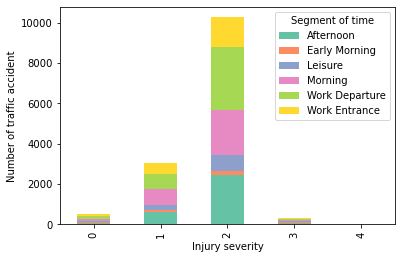

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado 'df' con las columnas 'Injury_severity' y 'Time_segment'
# Asegúrate de reemplazar 'df' con el nombre real de tu DataFrame

# Crear un DataFrame que contenga la información necesaria para el gráfico
df_plot = df.groupby(['Injury_severity', 'Time_segment']).size().unstack()

# Utilizar la paleta 'Set2' de Seaborn
colors = sns.color_palette('Set2', n_colors=len(df_plot.columns))

# Crear un gráfico de barras apiladas con la paleta de colores 'Set2'
plt.figure(figsize=(12, 6))
df_plot.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Injury severity')
plt.ylabel('Number of traffic accident')
plt.legend(title='Segment of time', bbox_to_anchor=(1, 1))
plt.show()


In [6]:
import pandas as pd

# Suponiendo que tienes un DataFrame llamado 'df' con las columnas 'Injury_severity' y 'Time_segment'
# Asegúrate de reemplazar 'df' con el nombre real de tu DataFrame

# Crear una tabla de contingencia
table = pd.crosstab(df['Injury_severity'], df['Time_segment'])

# Mostrar la tabla
print(table)


Time_segment     Afternoon  Early Morning  Leisure  Morning  Work Departure  \
Injury_severity                                                               
0                       89             14       50      130             157   
1                      640             58      244      825             722   
2                     2448            224      754     2250            3146   
3                       83             18       48       55              77   
4                        5              5        5        7               8   

Time_segment     Work Entrance  
Injury_severity                 
0                          100  
1                          553  
2                         1449  
3                           37  
4                            5  


In [9]:
df['Time_segment'].value_counts()

Work Departure    4110
Morning           3267
Afternoon         3265
Work Entrance     2144
Leisure           1101
Early Morning      319
Name: Time_segment, dtype: int64

In [10]:
import pandas as pd

# Suponiendo que tienes un DataFrame llamado 'df' con las columnas 'Injury_severity' y 'Time_segment'
# Asegúrate de reemplazar 'df' con el nombre real de tu DataFrame

# Crear una tabla de contingencia
table = pd.crosstab(df['Density'], df['Time_segment'])

# Mostrar la tabla
print(table)

Time_segment  Afternoon  Early Morning  Leisure  Morning  Work Departure  \
Density                                                                    
0                    93            303      303       72              91   
1                  1828             16      798     1185            1854   
2                  1344              0        0     2010            2165   

Time_segment  Work Entrance  
Density                      
0                       131  
1                       830  
2                      1183  


<Figure size 864x432 with 0 Axes>

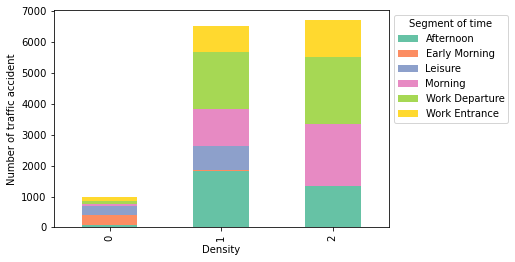

In [16]:
df_plot = df.groupby(['Density', 'Time_segment']).size().unstack()


colors = sns.color_palette('Set2', n_colors=len(df_plot.columns))

# Crear un gráfico de barras apiladas con la paleta de colores 'Set2'
plt.figure(figsize=(12, 6))
df_plot.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Density')
plt.ylabel('Number of traffic accident')
plt.legend(title='Segment of time', bbox_to_anchor=(1, 1))
plt.show()


In [12]:
df['Density'].value_counts()

2    6702
1    6511
0     993
Name: Density, dtype: int64

<Figure size 864x432 with 0 Axes>

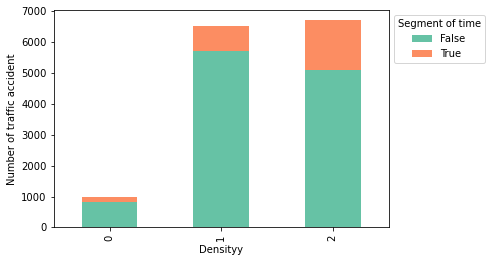

In [15]:
df_plot = df.groupby(['Density', 'Weekend Exists']).size().unstack()


colors = sns.color_palette('Set2', n_colors=len(df_plot.columns))

# Crear un gráfico de barras apiladas con la paleta de colores 'Set2'
plt.figure(figsize=(12, 6))
df_plot.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Densityy')
plt.ylabel('Number of traffic accident')
plt.legend(title='Segment of time', bbox_to_anchor=(1, 1))
plt.show()


<Figure size 864x432 with 0 Axes>

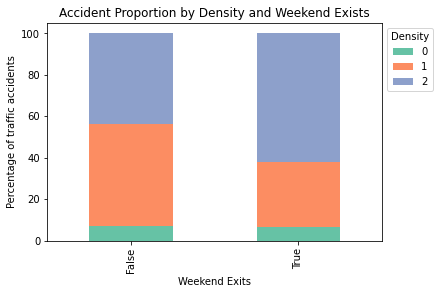

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes un DataFrame llamado 'df' con las columnas 'Density' y 'Weekend Exists'
# Asegúrate de reemplazar 'df' con el nombre real de tu DataFrame

# Calcular la proporción de accidentes por densidad para cada categoría 'Weekend Exists'
df_plot_percentage = df.groupby(['Weekend Exists', 'Density']).size().unstack()
df_plot_percentage = df_plot_percentage.div(df_plot_percentage.sum(axis=1), axis=0) * 100

# Utilizar la paleta 'Set2' de Seaborn
colors = sns.color_palette('Set2', n_colors=len(df_plot_percentage.columns))

# Crear un gráfico de barras apiladas con la paleta de colores 'Set2'
plt.figure(figsize=(12, 6))
df_plot_percentage.plot(kind='bar', stacked=True, color=colors)
plt.xlabel('Weekend Exits')
plt.ylabel('Percentage of traffic accidents')
plt.title('Accident Proportion by Density and Weekend Exists')
plt.legend(title='Density', bbox_to_anchor=(1, 1))
plt.show()


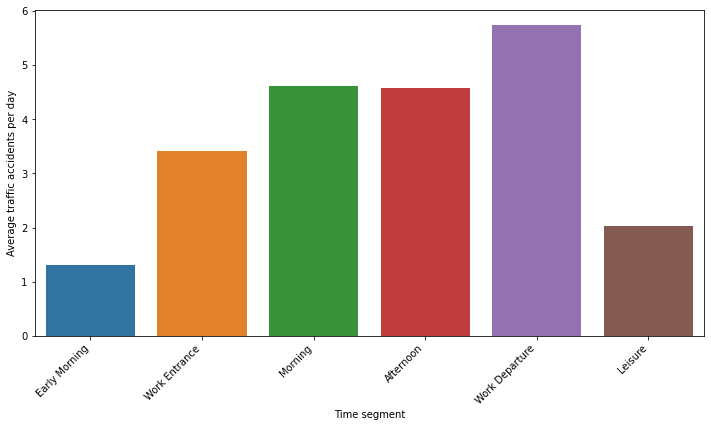

In [4]:
grouped_df = df.groupby(['Time_segment', 'Day']).size().reset_index(name='Accident_Count')
mean_accidents = grouped_df.groupby('Time_segment')['Accident_Count'].mean().reset_index(name='Mean_Accidents')

desired_order = ['Early Morning', 'Work Entrance', 'Morning', 'Afternoon', 'Work Departure', 'Leisure']


plt.figure(figsize=(12, 6))
sns.barplot(x='Time_segment', y='Mean_Accidents', data=mean_accidents, order=desired_order)

# Configuración adicional
#plt.title('Media de Accidentes de Tráfico por Franja Horaria al Día')
plt.xlabel('Time segment')
plt.ylabel('Average traffic accidents per day')
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.show()

